In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)
random.seed(1)

In [16]:
def gradient_descent(gradient_func, start_point, iterations, eps):
    '''
    Метод градиентного спуска
    :param gradient_func: функция градиента
    :param step_func: функция изменения шага
    :param start_point: начальное приближение
    :param iterations: число итераций до остановки
    :param eps: максимальное расстояние между точками для остановки
    '''
    current_point = start_point
    for it in range(iterations):
        next_gradient = gradient_func.next_gradient(current_point)
        next_point = current_point - next_gradient

        distance = np.linalg.norm(current_point - next_point)
        if distance < eps:
            return current_point, it

        current_point = next_point

    return current_point, iterations

In [17]:
class MeanSquaredError:
    def function(self, regression, points, state):
        sum_square_error = 0.0
        for p in points:
            sum_square_error += (p[1] - regression.function(state, p[0])) ** 2
        return sum_square_error / len(points)

    def gradient(self, regression, points, state):
        sum_square_error = np.array([0.0] * len(state + 1))
        for p in points:
            sum_square_error -= 2 * (p[1] - regression.function(state, p[0])) * regression.gradient(state, p[0])
        return sum_square_error / len(points)

In [18]:
class StandartGradient:
    def __init__(self, regression, points, n, error_func, step):
        self.regression = regression
        self.points = points
        self.n = n
        self.error_func = error_func
        self.step = step

    def next_gradient(self, current_point):
        result = self.step * self.error_func.gradient(self.regression, random.sample(self.points, self.n), current_point)
        return result


class MomentumGradient:
    def __init__(self, regression, points, n, error_func, mu, step):
        # mu = 0.9
        self.regression = regression
        self.points = points
        self.n = n
        self.error_func = error_func
        self.mu = mu
        self.step = step
        self.prev_gradient = np.array([0.0] * (len(points[0][0]) + 1))

    def next_gradient(self, current_point):
        result = self.mu * self.prev_gradient + self.step * self.error_func.gradient(self.regression, random.sample(self.points, self.n), current_point)
        self.prev_gradient = result
        return result


class NesterovGradient:
    def __init__(self, regression, points, n, error_func, mu, step):
        # mu = 0.9
        self.regression = regression
        self.points = points
        self.n = n
        self.error_func = error_func
        self.mu = mu
        self.step = step
        self.prev_gradient = np.array([0.0] * (len(points[0][0]) + 1))

    def next_gradient(self, current_point):
        result = self.mu * self.prev_gradient + self.step * self.error_func.gradient(self.regression, random.sample(self.points, self.n), current_point + self.mu * self.prev_gradient)
        self.prev_gradient = result
        return result


class AdagradGradient:
    def __init__(self, regression, points, n, error_func, step):
        self.regression = regression
        self.points = points
        self.n = n
        self.error_func = error_func
        self.step = step
        self.s = np.array([0.0] * (len(points[0][0]) + 1))

    def next_gradient(self, current_point):
        current_gradient = self.error_func.gradient(self.regression, random.sample(self.points, self.n), current_point)
        self.s = self.s + np.square(current_gradient)
        result = np.multiply(self.step / np.sqrt(self.s), current_gradient)
        return result


class RMSPropGradient:
    def __init__(self, regression, points, n, error_func, mu, step):
        # mu = 0.9
        self.regression = regression
        self.points = points
        self.n = n
        self.error_func = error_func
        self.mu = mu
        self.step = step
        self.s = np.array([0.0] * (len(points[0][0]) + 1))

    def next_gradient(self, current_point):
        current_gradient = self.error_func.gradient(self.regression, random.sample(self.points, self.n), current_point)
        self.s = self.mu * self.s + (1 - self.mu) * np.square(current_gradient)
        result = np.multiply(self.step / np.sqrt(self.s), current_gradient)
        return result


class AdamGradient:
    def __init__(self, regression, points, n, error_func, beta1, beta2, step):
        # beta1 = 0.9
        # beta2 = 0.999
        self.regression = regression
        self.points = points
        self.n = n
        self.error_func = error_func
        self.beta1 = beta1
        self.beta2 = beta2
        self.step = step
        self.g = np.array([0.0] * (len(points[0][0]) + 1))
        self.v = np.array([0.0] * (len(points[0][0]) + 1))
        self.it = 1

    def next_gradient(self, current_point):
        current_gradient = self.error_func.gradient(self.regression, random.sample(self.points, self.n), current_point)
        self.g = self.beta1 * self.g + (1 - self.beta1) * current_gradient
        self.v = self.beta2 * self.v + (1 - self.beta2) * np.square(current_gradient)
        self.it = self.it + 1
        g_temp = self.g / (1 - self.beta1 ** (self.it - 1))
        v_temp = self.v / (1 - self.beta2 ** (self.it - 1))
        result = self.step * g_temp / (np.sqrt(v_temp) + 1e-8)
        return result

In [19]:
class LinearRegression:
    def function(self, state, point):
        res = state[0]
        for i in range(len(point)):
            res += state[i + 1] * point[i]
        return res

    def gradient(self, state, point):
        return np.concatenate(([1.0], point))

In [20]:
number_of_points = 100
number_of_dimensions = 50

shifts = [random.uniform(-10, 10) for i in range(number_of_dimensions)]
multipliers = [random.uniform(0.1, 2) for i in range(number_of_dimensions)]

train_points = []
for i in range(number_of_points):
    sum = 1
    point = []
    for j in range(number_of_dimensions):
        x = (random.uniform(-5, 5) + shifts[j]) * multipliers[j]
        point.append(x)
        sum += (2 + j) * x
    train_points.append((point, sum))

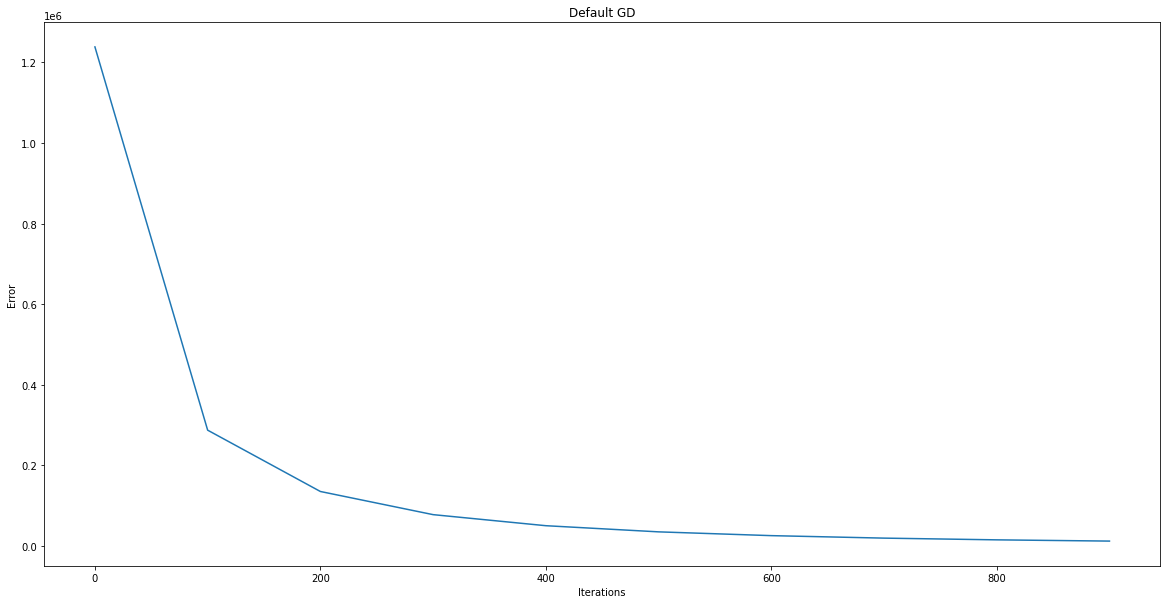

In [21]:
regression = LinearRegression()
error_func = MeanSquaredError()
step = 1e-4
eps = 1e-5

iterations = range(0, 1000, 100)
errors = []

for it in iterations:
    x = gradient_descent(
        gradient_func=StandartGradient(
            regression=regression,
            points=train_points,
            n=len(train_points),
            error_func=error_func,
            step=step
        ),
        start_point=np.array([0.0] * (len(train_points[0][0]) + 1)), 
        iterations=it,
        eps=eps
    )[0]
    errors.append(error_func.function(regression, train_points, x))

plt.title('Default GD')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.plot(iterations, errors)

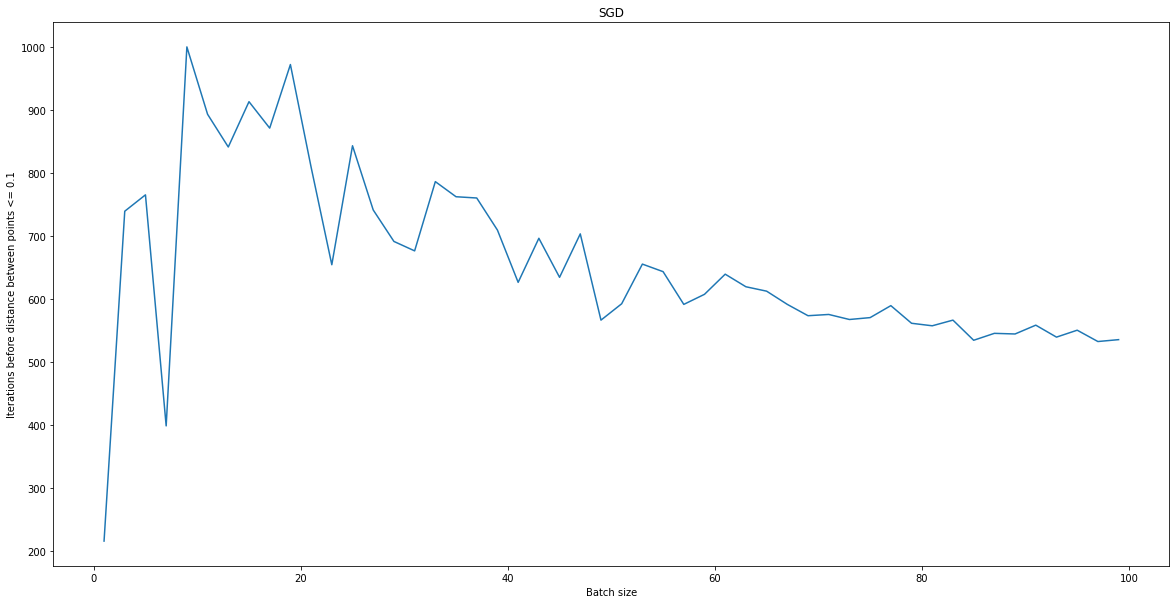

In [23]:
def draw_batch_size_to_iteration_plot(points, step, title):
    regression = LinearRegression()
    error_func = MeanSquaredError()
    eps = 1e-1

    batch_sizes = range(1, number_of_points + 1, 2)
    iterations = []

    for batch_size in batch_sizes:
        it = gradient_descent(
            gradient_func=StandartGradient(
                regression=regression,
                points=points,
                n=batch_size,
                error_func=error_func,
                step=step
            ),
            start_point=np.array([0.0] * (len(points[0][0]) + 1)), 
            iterations=1000,
            eps=eps
        )[1]
        iterations.append(it)

    plt.title(title)
    plt.xlabel('Batch size')
    plt.ylabel(f'Iterations before distance between points <= {eps}')
    plt.plot(batch_sizes, iterations)

draw_batch_size_to_iteration_plot(train_points, 1e-4, 'SGD')

In [24]:
avgs = []
maxs = []

for i in range(number_of_dimensions):
    sum = 0
    max = train_points[0][0][i]
    for j in range(number_of_points):
        sum += train_points[j][0][i]
        if max < train_points[j][0][i]:
            max = train_points[j][0][i]
    avgs.append(sum / number_of_points)
    maxs.append(max)

scaled_points = []
for p in train_points:
    scaled_points.append(([(p[0][i] - avgs[i]) / (maxs[i] - avgs[i]) for i in range(number_of_dimensions)], p[1]))

avg_sum = 0
for a in avgs:
    avg_sum += a

general_avg = abs(avg_sum) / len(avgs)

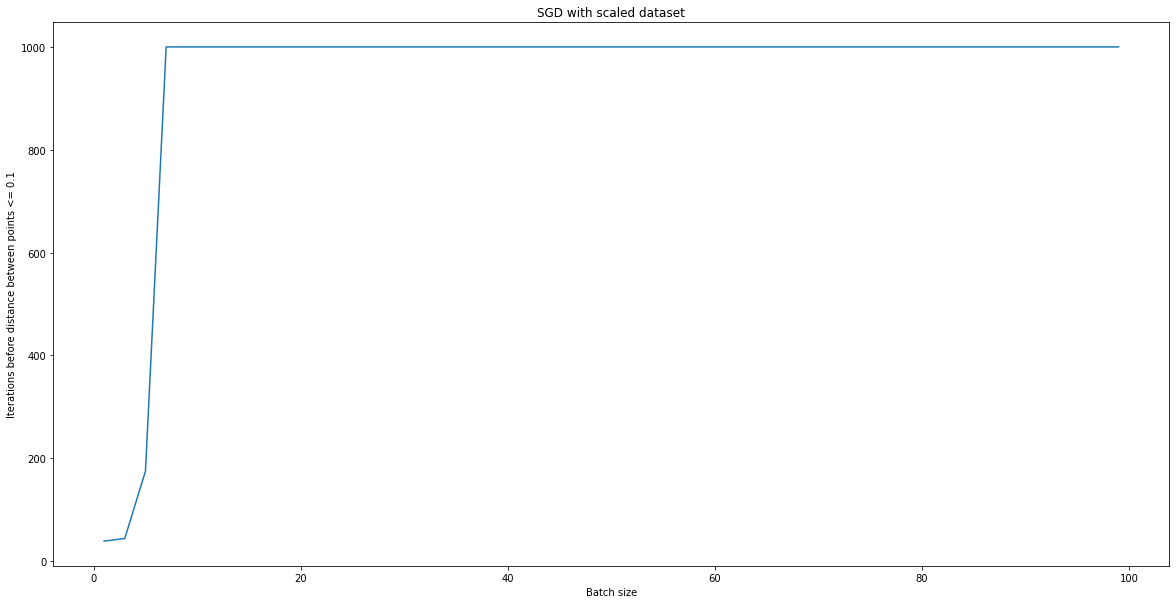

In [25]:
draw_batch_size_to_iteration_plot(scaled_points, 1e-4, 'SGD with scaled dataset')

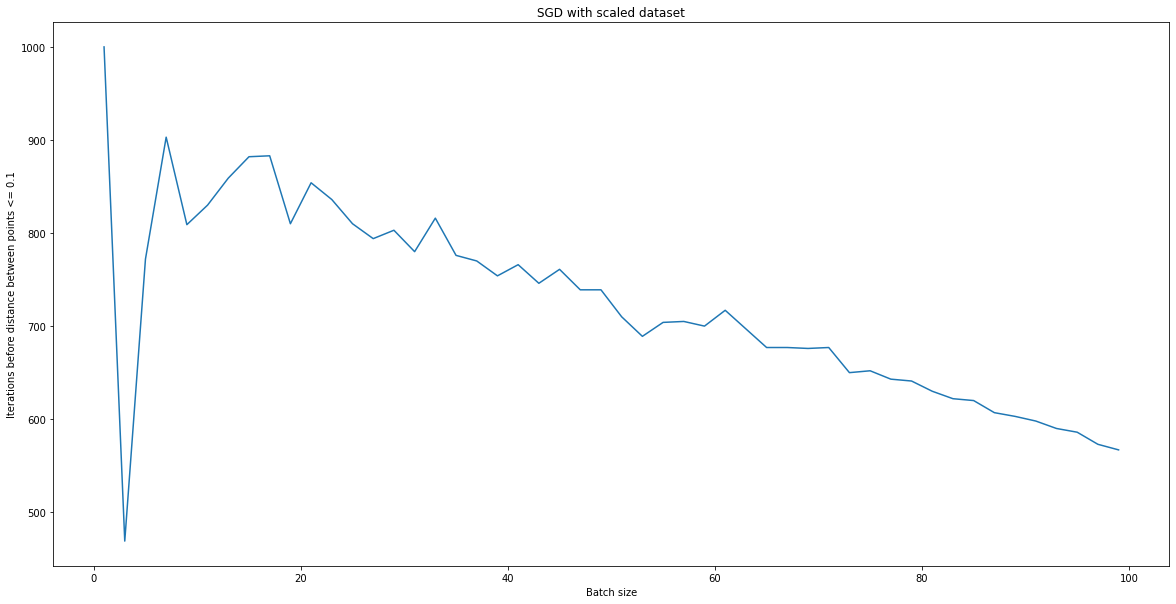

In [26]:
draw_batch_size_to_iteration_plot(scaled_points, 5e-2, 'SGD with scaled dataset')

In [71]:
def build_plot(label, get_gradient_func):
  regression = LinearRegression()
  error_func = MeanSquaredError()

  iterations = range(0, 1000, 10)
  errors = []

  for it in iterations:
      x = gradient_descent(
          gradient_func=get_gradient_func(regression, train_points, error_func),
          start_point=np.array([0.0] * (len(train_points[0][0]) + 1)), 
          iterations=it,
          eps=eps
      )[0]
      errors.append(error_func.function(regression, train_points, x))

  return plt.plot(iterations, errors, label=label)[0]

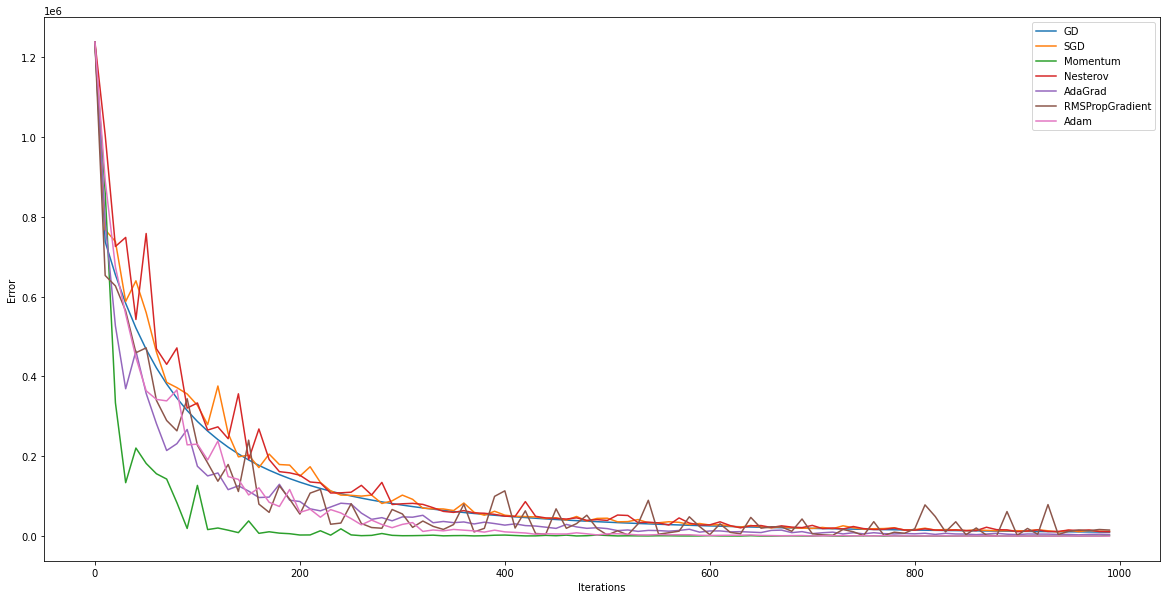

In [72]:
plots = [
    build_plot("GD", lambda regression, points, error_func:
              StandartGradient(
                  regression=regression,
                  points=points,
                  n=len(points),
                  error_func=error_func,
                  step=1e-4
              )),
    build_plot("SGD", lambda regression, points, error_func:
              StandartGradient(
                  regression=regression,
                  points=points,
                  n=int(len(points) / 20),
                  error_func=error_func,
                  step=1e-4
              )),
    build_plot("Momentum", lambda regression, points, error_func:
              MomentumGradient(
                      regression=regression,
                      points=points,
                      n=int(len(points) / 20),
                      error_func=error_func,
                      step=1e-4,
                      mu=0.9
              )),
    build_plot("Nesterov", lambda regression, points, error_func:
              NesterovGradient(
                  regression=regression,
                  points=points,
                  n=int(len(points) / 20),
                  error_func=error_func,
                  step=1e-5,
                  mu=0.9
              )),
    build_plot("AdaGrad", lambda regression, points, error_func:
                AdagradGradient(
                    regression=regression,
                    points=points,
                    n=int(len(points) / 20),
                    error_func=error_func,
                    step=1e1
                )),
    build_plot("RMSPropGradient", lambda regression, points, error_func:
                RMSPropGradient(
                    regression=regression,
                    points=points,
                    n=int(len(points) / 20),
                    error_func=error_func,
                    mu=0.9,
                    step=1e-0
                )),
    build_plot("Adam", lambda regression, points, error_func:
                AdamGradient(
                    regression=regression,
                    points=points,
                    n=int(len(points) / 20),
                    error_func=error_func,
                    beta1=0.9,
                    beta2=0.999,
                    step=1e-0
                ))
]

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend(handles=plots)